In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Potability
0    1998
1    1278
Name: count, dtype: int64
Accuracy: 0.6097560975609756
Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656

Confusion Matrix:
[[400   0]
 [256   0]]


c:\Users\Irfan\Documents\GitHub\water-quality-prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Irfan\Documents\GitHub\water-quality-prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Irfan\Documents\GitHub\water-quality-prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

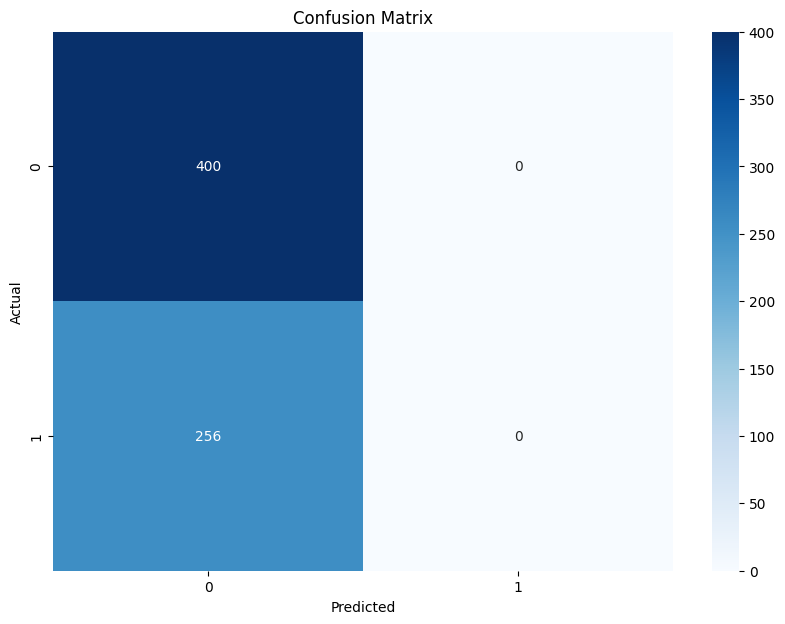

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the single CSV file
data = pd.read_csv("water_potability.csv")

# Check for class imbalance
print(data['Potability'].value_counts())

# Split the data into features (X) and target variable (y)
X = data.drop("Potability", axis=1)
y = data["Potability"]

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the imputer and scaler
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Fit and transform the imputer and scaler on the training data
X_train_imputed = imputer.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Transform the test data using the trained imputer and scaler
X_test_imputed = imputer.transform(X_test)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Optionally, you can save the training and testing sets into separate CSV files
X_train.to_csv("train.csv", index=False)
X_test.to_csv("test.csv", index=False)
y_train.to_csv("train_labels.csv", index=False)
y_test.to_csv("test_labels.csv", index=False)


In [12]:

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print("Train Data:")
display(train_data.head())

print("\nTest Data:")
display(test_data.head())


Train Data:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.822492,208.636720,22308.821729,5.850328,408.123255,502.789396,16.135732,60.393982,3.835332
1,6.037428,227.033994,12988.791229,8.476905,392.380529,306.386283,7.122391,41.190507,3.594217
2,8.445219,228.522860,28966.569327,6.179855,NaN,361.705354,14.554220,60.612230,4.400706
3,6.745307,218.424637,21871.838700,7.165509,NaN,373.050102,16.826619,74.086080,3.902353
4,6.506488,202.285938,17087.076902,6.201983,326.662368,481.771934,16.535186,46.205748,3.548776



Test Data:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,188.743562,19037.462638,6.034236,NaN,388.065857,15.149068,78.499418,2.723651
1,6.172517,187.787017,10498.635154,7.722561,322.521035,467.090425,21.233978,68.163642,4.129985
2,NaN,176.386651,26003.163265,7.809251,358.429774,336.142005,14.447961,90.224844,4.410674
3,6.369112,235.340943,34456.801132,9.170940,295.350524,357.417285,9.213268,59.280269,2.275903
4,6.140878,197.876090,26687.874483,7.587196,329.231853,548.072761,15.836330,41.263648,5.359460


In [13]:

print("Train Data Info:")
train_data.info()

print("\nTest Data Info:")
test_data.info()


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2233 non-null   float64
 1   Hardness         2620 non-null   float64
 2   Solids           2620 non-null   float64
 3   Chloramines      2620 non-null   float64
 4   Sulfate          1995 non-null   float64
 5   Conductivity     2620 non-null   float64
 6   Organic_carbon   2620 non-null   float64
 7   Trihalomethanes  2486 non-null   float64
 8   Turbidity        2620 non-null   float64
dtypes: float64(9)
memory usage: 184.3 KB

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               552 non-null    float64
 1   Hardness         656 non-null    float64
 2   Solids           65

In [14]:

print("Train Data Description:")
display(train_data.describe())

print("\nTest Data Description:")
display(test_data.describe())


Train Data Description:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2233.000000,2620.000000,2620.000000,2620.000000,1995.000000,2620.000000,2620.000000,2486.000000,2620.000000
mean,7.087744,196.520827,21888.067749,7.116362,333.987823,427.915853,14.272735,66.142715,3.973783
std,1.592009,32.637713,8760.109347,1.599220,41.526185,80.943805,3.296556,16.215209,0.780342
min,0.227499,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.492207
25%,6.098012,177.228680,15508.912365,6.122956,307.971180,367.438656,12.053684,55.511353,3.439608
50%,7.035037,196.928061,20866.335842,7.118162,333.073546,424.941336,14.214780,66.565709,3.969602
75%,8.065339,216.429168,27152.465983,8.112651,360.086779,484.109323,16.541731,77.164414,4.495065
max,13.541240,323.124000,61227.196008,13.043806,481.030642,753.342620,27.006707,124.000000,6.739000



Test Data Description:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,552.000000,656.000000,656.000000,656.000000,500.000000,656.000000,656.000000,628.000000,656.000000
mean,7.052682,195.765096,22517.423190,7.145899,332.929712,419.372574,14.333838,67.400107,3.938843
std,1.604774,33.847912,8790.961881,1.517886,41.007977,80.041176,3.356210,15.988226,0.780512
min,0.000000,94.091307,3900.913892,0.530351,182.397370,201.619737,4.966862,15.684877,1.450000
25%,6.058222,174.725888,16000.063139,6.183657,306.356436,360.446809,12.114530,57.612667,3.445331
50%,7.040380,197.065825,21107.483646,7.158147,332.987419,412.947370,14.294272,66.796757,3.881899
75%,8.016528,218.751875,27865.187332,8.140821,359.176359,474.943394,16.645626,77.986753,4.518865
max,14.000000,317.338124,55334.702799,13.127000,445.938391,674.443476,28.300000,116.161622,6.494249


In [15]:

print("Missing values in train data:")
print(train_data.isnull().sum())

print("\nMissing values in test data:")
print(test_data.isnull().sum())


Missing values in train data:
ph                 387
Hardness             0
Solids               0
Chloramines          0
Sulfate            625
Conductivity         0
Organic_carbon       0
Trihalomethanes    134
Turbidity            0
dtype: int64

Missing values in test data:
ph                 104
Hardness             0
Solids               0
Chloramines          0
Sulfate            156
Conductivity         0
Organic_carbon       0
Trihalomethanes     28
Turbidity            0
dtype: int64


In [16]:

train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)


print("Missing values after imputation in train data:")
print(train_data.isnull().sum())

print("\nMissing values after imputation in test data:")
print(test_data.isnull().sum())


Missing values after imputation in train data:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

Missing values after imputation in test data:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64


Accuracy: 0.6097560975609756
Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656

Confusion Matrix:
[[400   0]
 [256   0]]


c:\Users\Irfan\Documents\GitHub\water-quality-prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Irfan\Documents\GitHub\water-quality-prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Irfan\Documents\GitHub\water-quality-prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

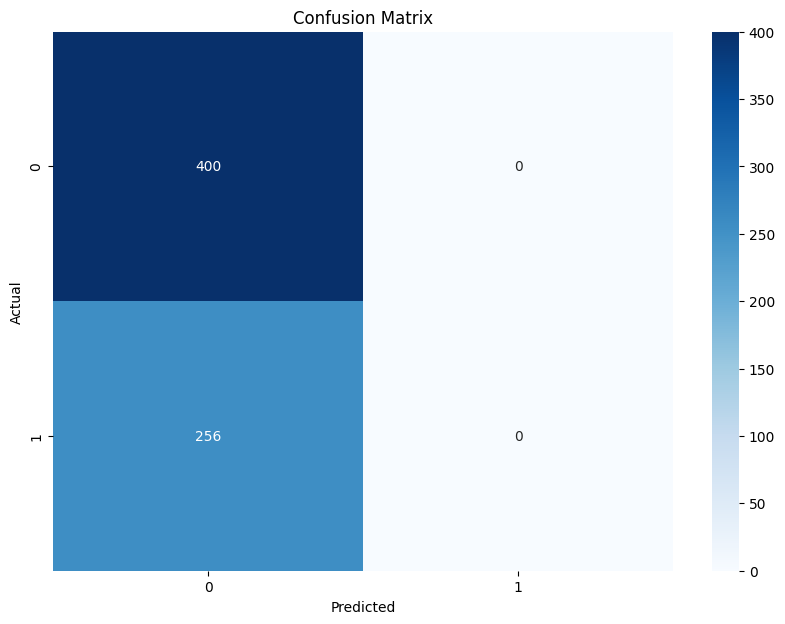

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import class_weight

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Initialize the model with class weights
model = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})

# Train the model using the imputed and scaled features
model.fit(X_train_scaled, y_train)

# Make predictions using the imputed and scaled features
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.6097560975609756
Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656

Confusion Matrix:
[[400   0]
 [256   0]]


c:\Users\Irfan\Documents\GitHub\water-quality-prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Irfan\Documents\GitHub\water-quality-prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Irfan\Documents\GitHub\water-quality-prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

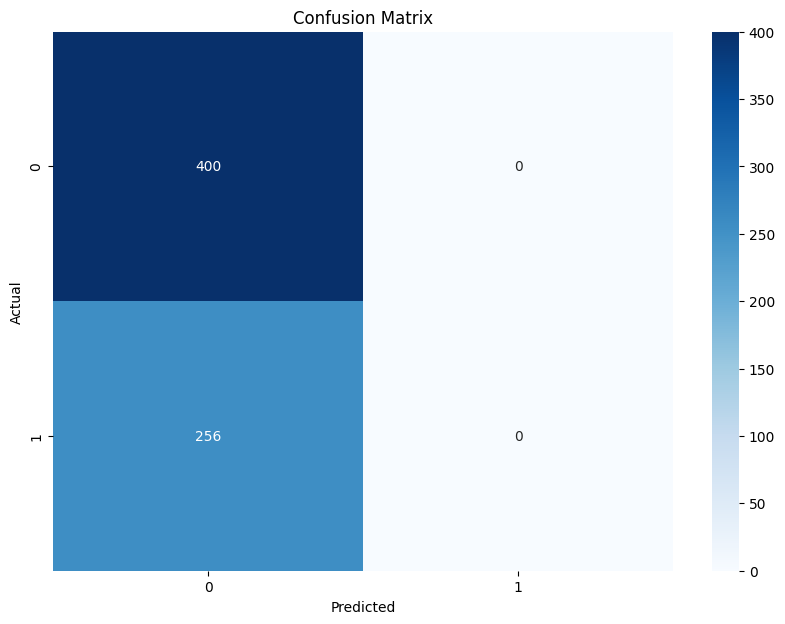

In [18]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
